In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
data=pd.read_csv('/content/Wine_clust.csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
# No any missing values and all the values are numeric so we avoid encoding

In [8]:
data.shape

(178, 13)

In [9]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaled_data=StandardScaler()
scaled_data=scaled_data.fit_transform(data)

In [10]:
# Find the optimum number of clusters -- Elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',n_init=20)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

In [11]:
wcss

[2313.9999999999986,
 1659.0079672511504,
 1277.928488844643,
 1175.2166769747232,
 1101.6176864100873,
 1045.8453357997728,
 983.0218232515889,
 945.2742378135785,
 908.2216908509902,
 857.5957414050353]

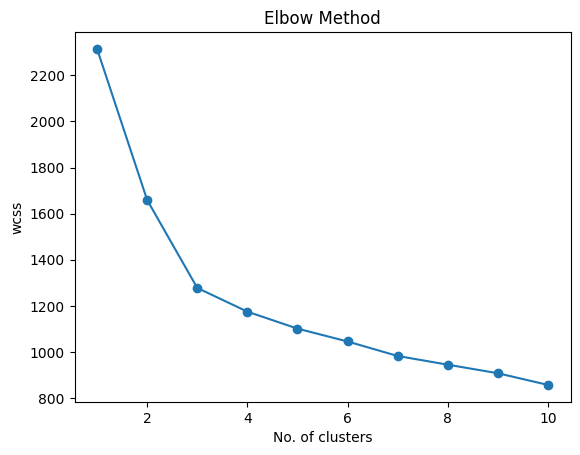

In [13]:
# Plot the Elbow method
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
# Based on the graph we taken the optimum number of clusters = 3
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=20)
kmeans.fit(scaled_data)
y_pred=kmeans.predict(scaled_data)

In [15]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

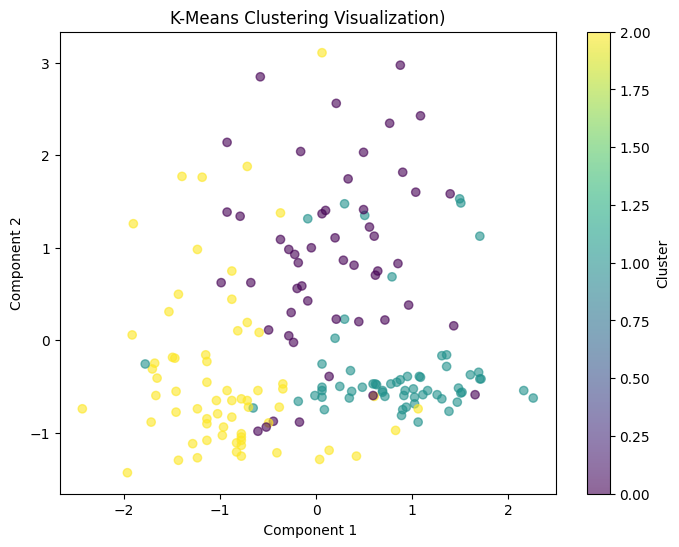

In [23]:
# Visualizing K-Means Clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0],scaled_data[:, 1],c=y_pred, cmap="viridis", alpha=0.6)
plt.xlabel(" Component 1")
plt.ylabel("Component 2")
plt.title("K-Means Clustering Visualization)")
plt.colorbar(label="Cluster")
plt.show()

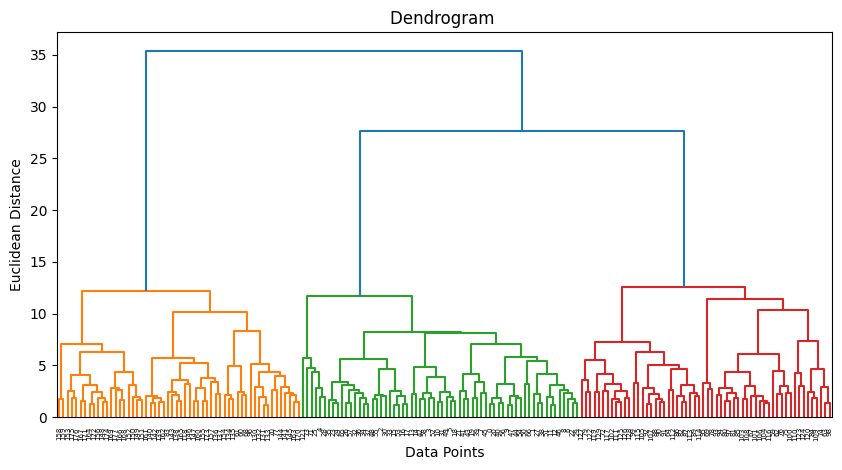

In [24]:
# Dendrogram
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(linkage(scaled_data, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram ")
plt.show()

In [25]:
# assume cluster=3 in blue line
from sklearn.cluster import AgglomerativeClustering

In [26]:
abc=AgglomerativeClustering(n_clusters= 3,metric='euclidean',linkage='ward')
y_abc=abc.fit_predict(scaled_data)

In [27]:
y_abc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
sil_ahc=silhouette_score(scaled_data,y_abc)

In [30]:
sil_ahc

0.2774439826952265

In [31]:
# Apply K-Means with optimal clusters---3
optimal_k=3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_pred = kmeans_optimal.fit_predict(scaled_data)

In [32]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

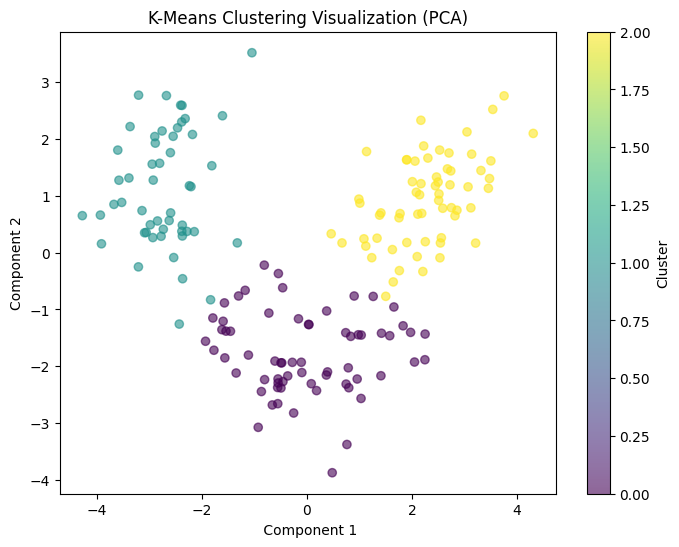

In [33]:
# Visualizing K-Means Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred, cmap="viridis", alpha=0.6)
plt.xlabel(" Component 1")
plt.ylabel("Component 2")
plt.title("K-Means Clustering Visualization (PCA)")
plt.colorbar(label="Cluster")
plt.show()

In [34]:
# DBSCAN CLUSTERING
from sklearn.cluster import KMeans, DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
data["DBSCAN_Cluster"] = dbscan.fit_predict(scaled_data)

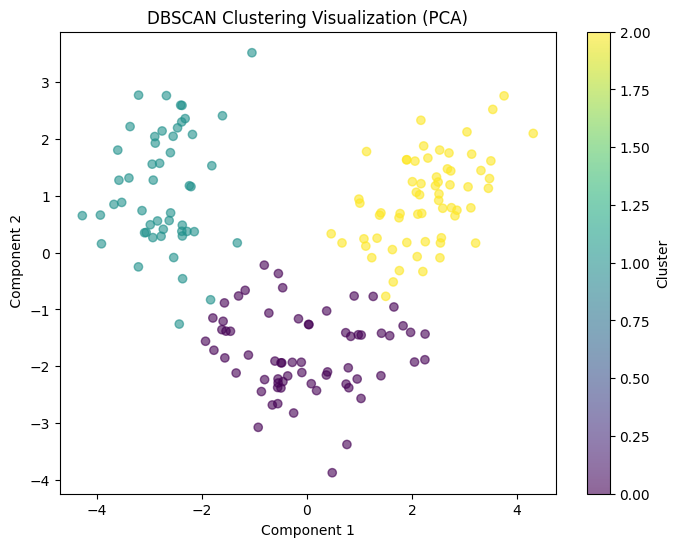

In [35]:
# Visualizing DBSCAN Clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred, cmap="viridis", alpha=0.6)
plt.xlabel("Component 1")
plt.ylabel(" Component 2")
plt.title("DBSCAN Clustering Visualization (PCA)")
plt.colorbar(label="Cluster")
plt.show()